In [1]:
import pandas as pd
from datetime import datetime, timezone
import seaborn as sns
import matplotlib.pyplot as plt
from river.drift import ADWIN
from river import metrics
from river import utils
from river import compose
from river import linear_model
from river import preprocessing

In [2]:
# this is states data from 2022-06-27 from 8am to 9am
os_historical_df = pd.read_csv("states_2022-06-27-08.csv")
os_historical_df

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact
0,1656316810,ab48cc,45.861923,-112.204039,252.600386,90.466758,0.00000,SCX298,False,False,False,6637.0,11269.98,11711.94,1.656317e+09,1.656317e+09
1,1656316810,4bccab,47.482773,8.438530,125.173856,128.659808,10.40384,SXS7P,False,False,False,3056.0,2628.90,2773.68,1.656317e+09,1.656317e+09
2,1656316810,503e70,51.901978,13.018951,241.210059,322.103581,0.32512,CXI78SM,False,False,False,3675.0,10988.04,11430.00,1.656317e+09,1.656317e+09
3,1656316810,a0cc06,32.577954,-105.793071,230.391090,100.030213,0.32512,AAL2054,False,False,False,NaN,10043.16,10645.14,1.656317e+09,1.656317e+09
4,1656316810,4b28e3,46.530304,6.583356,55.693167,168.274888,0.00000,HBPMP,False,False,False,7000.0,784.86,876.30,1.656317e+09,1.656317e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001689,1656320390,8014dd,29.308960,75.958522,244.218439,335.216430,5.20192,VTI691,False,False,False,7030.0,9243.06,9898.38,1.656320e+09,1.656320e+09
2001690,1656320390,39f4fc,47.898514,2.131828,NaN,NaN,NaN,FJEDQ,False,False,False,NaN,396.24,NaN,1.656320e+09,1.656320e+09
2001691,1656320390,46b826,48.692151,8.767307,238.632157,314.825318,0.00000,AEE6AV,False,False,False,3112.0,10363.20,10797.54,1.656320e+09,1.656320e+09
2001692,1656320390,471f71,56.384354,15.734419,232.247395,84.024209,-0.97536,WZZ1064,False,False,False,2001.0,11285.22,11696.70,1.656320e+09,1.656320e+09


In [13]:
os_historical_df.callsign.value_counts()

callsign
TEST1234    25747
             8916
TXLU01       2976
TXLU02       2810
TXLU03       2073
            ...  
N853VA          1
    8           1
  YN9T W        1
DL 4PH          1
GJI80M          1
Name: count, Length: 9058, dtype: int64

In [11]:
os_historical_df.loc[os_historical_df.callsign.str.strip().isin(['TXLU02'])]

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact
584,1656316810,49f0d7,NaN,NaN,NaN,NaN,NaN,TXLU01,False,False,False,NaN,NaN,NaN,NaN,1.656317e+09
1303,1656316810,3c838f,NaN,NaN,NaN,NaN,NaN,TXLU01,False,False,False,NaN,NaN,NaN,NaN,1.656317e+09
1446,1656316810,43bf95,55.036812,-1.709889,NaN,NaN,NaN,TXLU01,True,False,True,5454.0,NaN,NaN,1.656317e+09,1.656317e+09
1817,1656316810,c87ee8,NaN,NaN,NaN,NaN,NaN,TXLU01,True,False,False,4436.0,NaN,NaN,NaN,1.656317e+09
2406,1656316810,342345,NaN,NaN,NaN,NaN,NaN,TXLU01,False,False,False,4316.0,11597.64,NaN,NaN,1.656317e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998701,1656320390,43bf95,55.036812,-1.709889,NaN,NaN,NaN,TXLU01,True,False,True,5454.0,NaN,NaN,1.656320e+09,1.656320e+09
1998929,1656320390,c87ee8,NaN,NaN,NaN,NaN,NaN,TXLU01,True,False,False,4436.0,NaN,NaN,NaN,1.656320e+09
1999184,1656320390,49f0d7,NaN,NaN,NaN,NaN,NaN,TXLU01,False,False,False,NaN,NaN,NaN,NaN,1.656320e+09
2001326,1656320390,3c83de,NaN,NaN,NaN,NaN,NaN,TXLU01,False,False,False,NaN,NaN,NaN,NaN,1.656320e+09


In [15]:
os_historical_df.loc[os_historical_df.velocity.notnull()].callsign.value_counts()

callsign
            1495
00000000     395
ARP41        366
EWG4CP       359
TOM51V       359
            ... 
U5H  3         1
  YN9T W       1
DL 4PH         1
 PD66 V        1
GJI80M         1
Name: count, Length: 8036, dtype: int64

In [16]:
os_historical_df.loc[(os_historical_df.callsign.str.strip().isin(['ARP41'])) & (os_historical_df.velocity.notnull())]

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact
83,1656316810,3571d3,37.652710,-0.899885,116.301897,264.415498,0.32512,ARP41,False,False,False,NaN,320.04,365.76,1.656317e+09,1.656317e+09
2307,1656316810,3571d1,37.921417,-0.825494,147.314343,131.035345,1.30048,ARP41,False,False,False,NaN,3063.24,3253.74,1.656317e+09,1.656317e+09
5630,1656316820,3571d3,37.654358,-0.911865,109.904552,293.445098,0.32512,ARP41,False,False,False,NaN,312.42,365.76,1.656317e+09,1.656317e+09
7006,1656316820,3571d1,37.912308,-0.812462,147.179542,131.883011,-1.30048,ARP41,False,False,False,NaN,3070.86,3253.74,1.656317e+09,1.656317e+09
11533,1656316830,3571d1,37.903577,-0.800330,146.728411,132.584489,0.97536,ARP41,False,False,False,NaN,3070.86,3261.36,1.656317e+09,1.656317e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021057,1656318660,3571d1,37.782154,-0.803419,61.477672,45.339024,-4.22656,ARP41,True,False,False,NaN,NaN,NaN,1.656318e+09,1.656318e+09
1025166,1656318670,3571d1,37.782154,-0.803419,61.477672,45.339024,-4.22656,ARP41,True,False,False,NaN,NaN,NaN,1.656318e+09,1.656318e+09
1031835,1656318680,3571d1,37.782154,-0.803419,61.477672,45.339024,-4.22656,ARP41,True,False,False,NaN,NaN,NaN,1.656318e+09,1.656318e+09
1037691,1656318690,3571d1,37.782154,-0.803419,61.477672,45.339024,-4.22656,ARP41,True,False,False,NaN,NaN,NaN,1.656318e+09,1.656318e+09


In [27]:
os_historical_df.loc[os_historical_df.callsign.str.strip().isin(['ARP41'])]

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact
83,1656316810,3571d3,37.652710,-0.899885,116.301897,264.415498,0.32512,ARP41,False,False,False,NaN,320.04,365.76,1.656317e+09,1.656317e+09
2307,1656316810,3571d1,37.921417,-0.825494,147.314343,131.035345,1.30048,ARP41,False,False,False,NaN,3063.24,3253.74,1.656317e+09,1.656317e+09
5630,1656316820,3571d3,37.654358,-0.911865,109.904552,293.445098,0.32512,ARP41,False,False,False,NaN,312.42,365.76,1.656317e+09,1.656317e+09
7006,1656316820,3571d1,37.912308,-0.812462,147.179542,131.883011,-1.30048,ARP41,False,False,False,NaN,3070.86,3253.74,1.656317e+09,1.656317e+09
11533,1656316830,3571d1,37.903577,-0.800330,146.728411,132.584489,0.97536,ARP41,False,False,False,NaN,3070.86,3261.36,1.656317e+09,1.656317e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021057,1656318660,3571d1,37.782154,-0.803419,61.477672,45.339024,-4.22656,ARP41,True,False,False,NaN,NaN,NaN,1.656318e+09,1.656318e+09
1025166,1656318670,3571d1,37.782154,-0.803419,61.477672,45.339024,-4.22656,ARP41,True,False,False,NaN,NaN,NaN,1.656318e+09,1.656318e+09
1031835,1656318680,3571d1,37.782154,-0.803419,61.477672,45.339024,-4.22656,ARP41,True,False,False,NaN,NaN,NaN,1.656318e+09,1.656318e+09
1037691,1656318690,3571d1,37.782154,-0.803419,61.477672,45.339024,-4.22656,ARP41,True,False,False,NaN,NaN,NaN,1.656318e+09,1.656318e+09


In [17]:
os_non_null_vel = os_historical_df.loc[os_historical_df.velocity.notnull()]

In [23]:
os_non_null_vel.callsign.value_counts()

callsign
            1495
00000000     395
ARP41        366
EWG4CP       359
TOM51V       359
            ... 
U5H  3         1
  YN9T W       1
DL 4PH         1
 PD66 V        1
GJI80M         1
Name: count, Length: 8036, dtype: int64

In [20]:
corr_matrix = os_non_null_vel[["baroaltitude", "geoaltitude", "velocity", "heading", "squawk", "vertrate", "lat", "lon"]].corr()
corr_matrix

,baroaltitude,geoaltitude,velocity,heading,squawk,vertrate,lat,lon
baroaltitude,1.000000,0.990241,0.869468,-0.063708,-0.028416,0.039653,0.095451,-0.165725
geoaltitude,0.990241,1.000000,0.881267,-0.064054,-0.028946,0.039873,0.088041,-0.163311
velocity,0.869468,0.881267,1.000000,-0.168890,-0.026671,0.052223,0.063168,-0.152694
heading,-0.063708,-0.064054,-0.168890,1.000000,0.019249,-0.011805,0.012851,0.089871
squawk,-0.028416,-0.028946,-0.026671,0.019249,1.000000,0.018393,0.057132,-0.070570
vertrate,0.039653,0.039873,0.052223,-0.011805,0.018393,1.000000,0.025321,-0.018787
lat,0.095451,0.088041,0.063168,0.012851,0.057132,0.025321,1.000000,-0.441661
lon,-0.165725,-0.163311,-0.152694,0.089871,-0.070570,-0.018787,-0.441661,1.000000


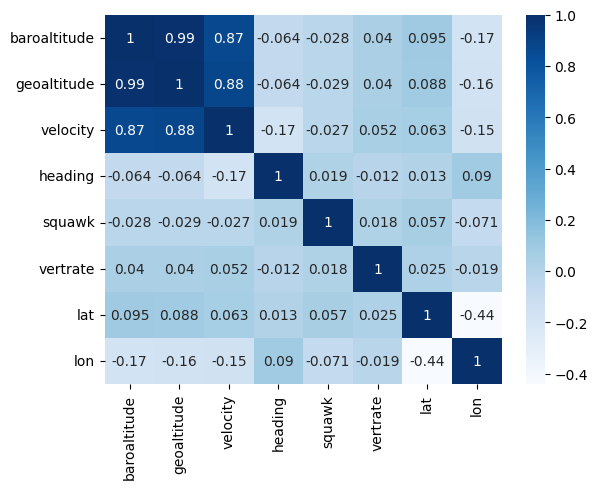

In [21]:
# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

# Show the plot
plt.show()

In [2]:
os_df = pd.read_csv("state_vectors_100.csv")
os_df

,timestamp,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,geo_altitude,on_ground,velocity,true_track,vertical_rate,sensors,baro_altitude,squawk,spi,position_source
0,1731816972,4b5da6,TE25,Switzerland,1731816960,1731816960,8.5650,47.4418,NaN,True,0.06,343.12,NaN,NaN,NaN,NaN,False,0
1,1731816972,4b5da7,TE26,Switzerland,1731816901,1731816901,8.5581,47.4516,NaN,True,0.00,123.75,NaN,NaN,NaN,NaN,False,0
2,1731816972,4b5da8,ATL778,Switzerland,1731816967,1731816967,8.5581,47.4532,NaN,True,3.86,5.62,NaN,NaN,NaN,NaN,False,0
3,1731816972,4b5d9e,ATL785,Switzerland,1731816484,1731816863,8.5650,47.4436,NaN,True,0.13,357.19,NaN,NaN,NaN,NaN,False,0
4,1731816972,4b5c1a,GUSTI2,Switzerland,1731816971,1731816971,8.5403,47.4790,NaN,True,7.46,135.00,NaN,NaN,NaN,NaN,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,1731817507,040170,ETH734,Ethiopia,1731817506,1731817507,6.0314,46.8122,11597.64,False,234.04,318.74,-2.93,NaN,11635.74,5743.0,False,0
948,1731817507,3c496d,TUI1DH,Germany,1731817506,1731817506,7.5821,47.5999,11887.20,False,218.32,198.26,0.00,NaN,11910.06,2547.0,False,0
949,1731817507,750449,MAS2,Malaysia,1731817506,1731817506,10.3734,46.7560,12192.00,False,226.15,282.61,0.33,NaN,12222.48,3233.0,False,0
950,1731817507,06a2b1,QTR4J,Qatar,1731817505,1731817506,6.6607,47.3042,10972.80,False,219.16,269.73,0.00,NaN,11018.52,3201.0,False,0


In [3]:
corr_matrix = os_df[["geo_altitude", "velocity", "true_track", "vertical_rate", "latitude", "longitude"]].corr()
corr_matrix

,geo_altitude,velocity,true_track,vertical_rate,latitude,longitude
geo_altitude,1.000000,0.942537,0.686079,0.768981,-0.314086,-0.315981
velocity,0.942537,1.000000,0.567271,0.645157,-0.774176,-0.614571
true_track,0.686079,0.567271,1.000000,0.693410,-0.517597,-0.588000
vertical_rate,0.768981,0.645157,0.693410,1.000000,0.135069,-0.609375
latitude,-0.314086,-0.774176,-0.517597,0.135069,1.000000,0.536782
longitude,-0.315981,-0.614571,-0.588000,-0.609375,0.536782,1.000000


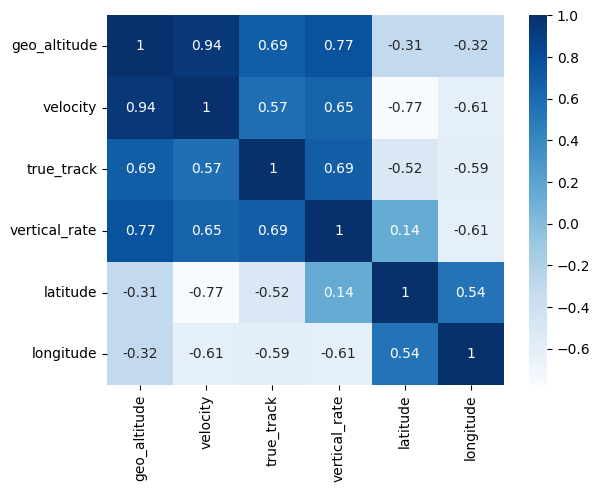

In [5]:
os_df.dtypes

timestamp            int64
icao24              object
callsign            object
origin_country      object
time_position        int64
last_contact         int64
longitude          float64
latitude           float64
geo_altitude       float64
on_ground             bool
velocity           float64
true_track         float64
vertical_rate      float64
sensors            float64
baro_altitude      float64
squawk             float64
spi                   bool
position_source      int64
dtype: object

In [6]:
os_df.describe()

,timestamp,time_position,last_contact,longitude,latitude,geo_altitude,velocity,true_track,vertical_rate,sensors,baro_altitude,squawk,position_source
count,9.520000e+02,9.520000e+02,9.520000e+02,952.000000,952.000000,592.000000,952.000000,952.000000,569.000000,0.0,567.000000,623.000000,952.0
mean,1.731817e+09,1.731817e+09,1.731817e+09,7.671508,47.027434,10418.946993,134.313582,244.432416,-1.772970,NaN,10925.440423,2241.290530,0.0
std,1.623825e+02,2.095793e+02,1.684035e+02,1.059587,0.477877,2476.083070,106.500070,85.355747,3.863887,NaN,1253.076316,1847.561073,0.0
min,1.731817e+09,1.731816e+09,1.731817e+09,6.002300,45.840000,236.220000,0.000000,0.000000,-18.860000,NaN,6073.140000,1000.000000,0.0
25%,1.731817e+09,1.731817e+09,1.731817e+09,6.665350,46.595250,10363.200000,8.230000,171.560000,-0.330000,NaN,10454.640000,1000.000000,0.0
50%,1.731817e+09,1.731817e+09,1.731817e+09,7.668500,47.220400,10972.800000,213.165000,283.295000,0.000000,NaN,11033.760000,1000.000000,0.0
75%,1.731817e+09,1.731817e+09,1.731817e+09,8.560200,47.450175,11582.400000,220.850000,296.650000,0.000000,NaN,11658.600000,3201.000000,0.0
max,1.731818e+09,1.731818e+09,1.731818e+09,10.522000,47.807200,12199.620000,241.280000,359.760000,0.330000,NaN,12245.340000,6006.000000,0.0


In [7]:
os_df.loc[os_df["callsign"].str.strip().isin(["TE25"])]

,timestamp,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,geo_altitude,on_ground,velocity,true_track,vertical_rate,sensors,baro_altitude,squawk,spi,position_source
0,1731816972,4b5da6,TE25,Switzerland,1731816960,1731816960,8.5650,47.4418,NaN,True,0.06,343.12,NaN,NaN,NaN,NaN,False,0
11,1731816966,4b5da6,TE25,Switzerland,1731816960,1731816960,8.5650,47.4418,NaN,True,0.06,343.12,NaN,NaN,NaN,NaN,False,0
22,1731816986,4b5da6,TE25,Switzerland,1731816981,1731816981,8.5651,47.4419,NaN,True,0.00,309.38,NaN,NaN,NaN,NaN,False,0
33,1731816990,4b5da6,TE25,Switzerland,1731816981,1731816981,8.5651,47.4419,NaN,True,0.00,309.38,NaN,NaN,NaN,NaN,False,0
44,1731816997,4b5da6,TE25,Switzerland,1731816981,1731816981,8.5651,47.4419,NaN,True,0.00,309.38,NaN,NaN,NaN,NaN,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,1731817346,4b5da6,TE25,Switzerland,1731817329,1731817335,8.5582,47.4486,NaN,True,0.00,225.00,NaN,NaN,NaN,NaN,False,0
641,1731817350,4b5da6,TE25,Switzerland,1731817329,1731817335,8.5582,47.4486,NaN,True,0.00,225.00,NaN,NaN,NaN,NaN,False,0
651,1731817360,4b5da6,TE25,Switzerland,1731817351,1731817351,8.5581,47.4486,NaN,True,0.64,244.69,NaN,NaN,NaN,NaN,False,0
662,1731817364,4b5da6,TE25,Switzerland,1731817351,1731817351,8.5581,47.4486,NaN,True,0.64,244.69,NaN,NaN,NaN,NaN,False,0


<AxesSubplot: >

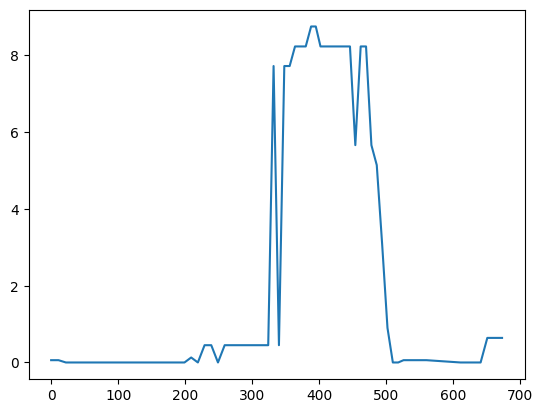

In [8]:
os_df.loc[os_df["callsign"].str.strip().isin(["TE25"])]["velocity"].plot.line()

<AxesSubplot: >

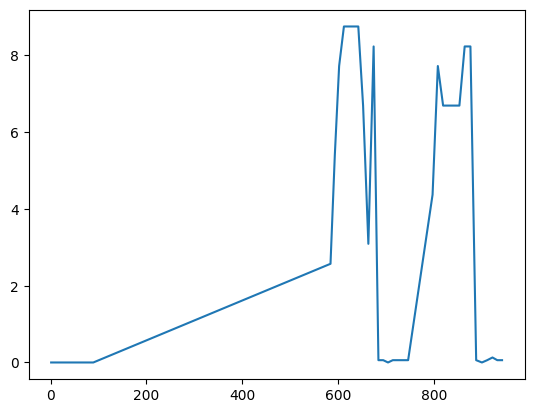

In [9]:
os_df.loc[os_df["callsign"].str.strip().isin(["TE26"])]["velocity"].plot.line()

In [10]:
os_df[["icao24", "callsign"]].values

array([['4b5da6', 'TE25    '],
       ['4b5da7', 'TE26    '],
       ['4b5da8', 'ATL778  '],
       ...,
       ['750449', 'MAS2    '],
       ['06a2b1', 'QTR4J   '],
       ['4b193a', 'GSW610  ']], dtype=object)

In [11]:
os_df.groupby("callsign")["icao24"].unique()

callsign
AFR635      [3965a5]
AFR655      [394a08]
ATL778      [4b5da8]
ATL785      [4b5d9e]
BEL28A      [44ccd8]
BEL4KE      [44ccc8]
CCA949      [781fb2]
ETH734      [040170]
GSW610      [4b193a]
GUSTI2      [4b5c1a]
MAINT01     [4b193a]
MAS2        [750449]
QTR4J       [06a2b1]
TE25        [4b5da6]
TE26        [4b5da7]
TUI1DH      [3c496d]
Name: icao24, dtype: object

In [12]:
os_df.groupby("callsign")["velocity"].mean()

callsign
AFR635      217.228351
AFR655      221.436167
ATL778        4.644697
ATL785        4.220000
BEL28A      234.988250
BEL4KE      240.265952
CCA949      203.957500
ETH734      231.903100
GSW610        0.000000
GUSTI2       11.680842
MAINT01       0.000000
MAS2        225.973333
QTR4J       218.499100
TE25          2.389857
TE26          3.118500
TUI1DH      218.845714
Name: velocity, dtype: float64

In [13]:
os_df.groupby("callsign").agg({"velocity": ["min", "mean", "median", "max", "std"]})

velocity                                       
              min        mean   median     max       std
callsign                                                
AFR635     214.74  217.228351  217.660  218.55  0.914340
AFR655     216.72  221.436167  222.310  224.76  2.724787
ATL778       0.00    4.644697    7.590    8.75  3.913484
ATL785       0.13    4.220000    0.130    8.75  4.275846
BEL28A     232.74  234.988250  235.035  236.64  1.171600
BEL4KE     238.71  240.265952  240.250  241.28  0.526359
CCA949     187.71  203.957500  207.070  216.73  8.188989
ETH734     229.25  231.903100  231.680  234.23  1.388131
GSW610       0.00    0.000000    0.000    0.00  0.000000
GUSTI2       0.06   11.680842   12.860   25.21  6.177773
MAINT01      0.00    0.000000    0.000    0.00  0.000000
MAS2       224.88  225.973333  226.150  226.34  0.453349
QTR4J      216.74  218.499100  218.450  220.85  1.240131
TE25         0.00    2.389857    0.450    8.75  3.508299
TE26         0.00    3.118500    0.060    8.75  3.679071
TUI1DH     218.32  218.845714  218.970  218.97  0.230056

In [14]:
os_df[:1].callsign.values

array(['TE25    '], dtype=object)

In [15]:
os_df.callsign.value_counts()

callsign
CCA949      100
ETH734      100
QTR4J       100
AFR635       97
GUSTI2       95
TE25         70
ATL778       66
AFR655       60
ATL785       58
MAINT01      42
BEL4KE       42
TE26         40
BEL28A       40
TUI1DH       21
GSW610       12
MAS2          9
Name: count, dtype: int64

In [16]:
datetime.fromtimestamp(1731816972)

datetime.datetime(2024, 11, 16, 23, 16, 12)

In [17]:
datetime.utcfromtimestamp(1731816972)

datetime.datetime(2024, 11, 17, 4, 16, 12)

In [18]:
datetime.fromtimestamp(1731816972, timezone.utc)

datetime.datetime(2024, 11, 17, 4, 16, 12, tzinfo=datetime.timezone.utc)

In [19]:
ts_groups = os_df.groupby("timestamp").size()
ts_groups

timestamp
1731816966    11
1731816972    11
1731816986    11
1731816990    11
1731816996    11
              ..
1731817478    11
1731817484    11
1731817491    10
1731817494    10
1731817507    10
Length: 87, dtype: int64

In [20]:
os_df_CCA949 = os_df.loc[os_df.callsign.str.strip() == "CCA949"]
os_df_CCA949

,timestamp,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,geo_altitude,on_ground,velocity,true_track,vertical_rate,sensors,baro_altitude,squawk,spi,position_source
7,1731816972,781fb2,CCA949,China,1731816970,1731816971,9.2105,47.1232,10805.16,False,215.58,206.20,-4.88,NaN,10835.64,6006.0,False,0
18,1731816966,781fb2,CCA949,China,1731816965,1731816965,9.2175,47.1329,10835.64,False,216.73,206.20,-5.20,NaN,10866.12,6006.0,False,0
29,1731816986,781fb2,CCA949,China,1731816985,1731816985,9.1927,47.0985,10728.96,False,214.89,206.14,-5.20,NaN,10774.68,6006.0,False,0
40,1731816990,781fb2,CCA949,China,1731816988,1731816989,9.1881,47.0920,10713.72,False,214.43,206.20,-5.20,NaN,10751.82,6006.0,False,0
51,1731816997,781fb2,CCA949,China,1731816995,1731816996,9.1794,47.0798,10675.62,False,213.74,206.13,-4.88,NaN,10713.72,6006.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1731817478,781fb2,CCA949,China,1731817477,1731817477,8.7992,46.2630,6202.68,False,188.68,174.37,-7.80,NaN,6316.98,6006.0,False,0
916,1731817484,781fb2,CCA949,China,1731817483,1731817483,8.8007,46.2528,6156.96,False,188.17,174.35,-8.13,NaN,6271.26,6006.0,False,0
926,1731817491,781fb2,CCA949,China,1731817490,1731817490,8.8023,46.2411,6103.62,False,187.71,174.18,-7.80,NaN,6210.30,6006.0,False,0
936,1731817494,781fb2,CCA949,China,1731817492,1731817493,8.8029,46.2368,6080.76,False,187.71,174.18,-8.45,NaN,6187.44,6006.0,False,0


In [21]:
adwin = ADWIN()

anomalies = []

for _, row in os_df_CCA949.iterrows():
    print(row["velocity"])
    adwin.update(row["velocity"])
    if adwin.drift_detected:
        print(f"anomaly detected: {row['velocity']}")
        anomalies.append((row["timestamp"], row["velocity"]))
        
# Output anomalies
print("Anomalies detected:")
for anomaly in anomalies:
    print(f"Timestamp: {anomaly[0]}, Value: {anomaly[1]}")

215.58
216.73
214.89
214.43
213.74
213.74
213.74
212.59
212.59
211.9
211.9
211.9
211.9
211.9
210.29
210.29
209.6
209.6
209.14
209.6
210.29
210.29
211.44
211.44
210.75
211.44
211.44
211.9
212.13
211.9
212.13
211.21
211.21
210.52
211.44
211.21
210.06
209.6
209.6
209.6
208.69
208.69
208.69
208.22
208.22
208.22
207.3
207.3
207.07
206.61
207.07
207.07
204.77
204.08
202.47
200.63
200.17
200.17
200.17
200.63
200.17
200.17
200.17
199.02
anomaly detected: 199.02
198.56
198.56
199.02
198.8
198.53
200.07
200.07
200.94
203.58
203.95
202.71
202.69
203.2
200.81
201.46
197.82
194.47
193.39
192.78
192.22
192.78
192.78
190.12
190.68
191.19
191.19
191.19
191.66
190.22
189.71
189.2
188.68
anomaly detected: 188.68
188.17
187.71
187.71
187.71
Anomalies detected:
Timestamp: 1731817314, Value: 199.02
Timestamp: 1731817478, Value: 188.68


In [22]:
adwin = ADWIN()

anomalies = []

previous_value = None
rolling_diffs = []

for _, row in os_df_CCA949.iterrows():
    if previous_value is None:
        rolling_diffs.append(None)
    else:
        print(row["velocity"] - previous_value)
        rolling_diffs.append(row["velocity"] - previous_value)   
    print(row["velocity"])
    # Update previous value
    previous_value = row["velocity"]
    adwin.update(row["velocity"])
    if adwin.drift_detected:
        print(f"anomaly detected: {row['velocity']}")
        anomalies.append((row["timestamp"], row["velocity"]))
        
# Output anomalies
print("Anomalies detected:")
for anomaly in anomalies:
    print(f"Timestamp: {anomaly[0]}, Value: {anomaly[1]}")

215.58
1.1499999999999773
216.73
-1.8400000000000034
214.89
-0.45999999999997954
214.43
-0.6899999999999977
213.74
0.0
213.74
0.0
213.74
-1.1500000000000057
212.59
0.0
212.59
-0.6899999999999977
211.9
0.0
211.9
0.0
211.9
0.0
211.9
0.0
211.9
-1.6100000000000136
210.29
0.0
210.29
-0.6899999999999977
209.6
0.0
209.6
-0.46000000000000796
209.14
0.46000000000000796
209.6
0.6899999999999977
210.29
0.0
210.29
1.1500000000000057
211.44
0.0
211.44
-0.6899999999999977
210.75
0.6899999999999977
211.44
0.0
211.44
0.46000000000000796
211.9
0.22999999999998977
212.13
-0.22999999999998977
211.9
0.22999999999998977
212.13
-0.9199999999999875
211.21
0.0
211.21
-0.6899999999999977
210.52
0.9199999999999875
211.44
-0.22999999999998977
211.21
-1.1500000000000057
210.06
-0.46000000000000796
209.6
0.0
209.6
0.0
209.6
-0.9099999999999966
208.69
0.0
208.69
0.0
208.69
-0.46999999999999886
208.22
0.0
208.22
0.0
208.22
-0.9199999999999875
207.3
0.0
207.3
-0.2300000000000182
207.07
-0.45999999999997954
206.61
0.4

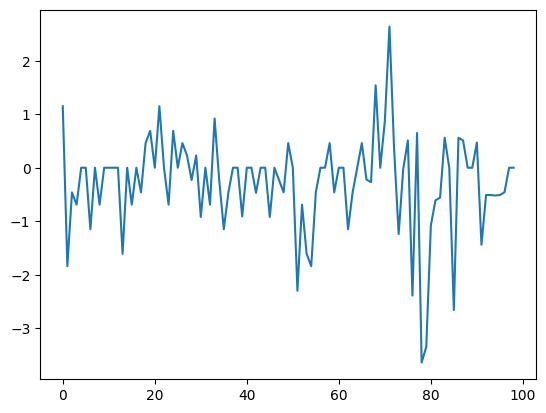

In [23]:
plt.plot(rolling_diffs[1:])

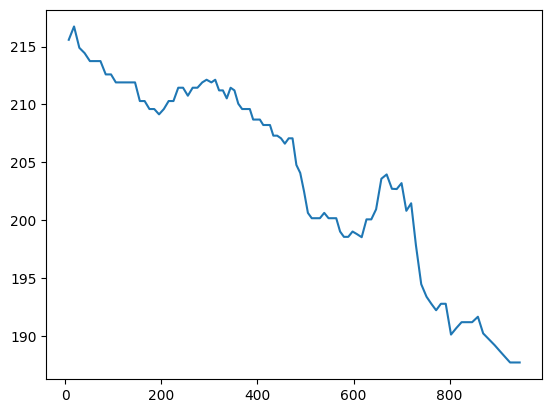

In [24]:
plt.plot(os_df_CCA949["velocity"])

In [25]:
adwin = ADWIN()

anomalies = []

previous_value = None
rolling_percs = []

for _, row in os_df_CCA949.iterrows():
    if previous_value is None:
        rolling_percs.append(None)
    else:
        perc_change = ((row["velocity"] - previous_value) / previous_value) * 100
        print(perc_change)
        rolling_percs.append(perc_change)   
    print(row["velocity"])
    # Update previous value
    previous_value = row["velocity"]
    adwin.update(row["velocity"])
    if adwin.drift_detected:
        print(f"anomaly detected: {row['velocity']}")
        anomalies.append((row["timestamp"], row["velocity"]))
        
# Output anomalies
print("Anomalies detected:")
for anomaly in anomalies:
    print(f"Timestamp: {anomaly[0]}, Value: {anomaly[1]}")

215.58
0.5334446609147311
216.73
-0.8489826050846692
214.89
-0.2140630089813298
214.43
-0.32178333255607783
213.74
0.0
213.74
0.0
213.74
-0.538036867221861
212.59
0.0
212.59
-0.3245684180817525
211.9
0.0
211.9
0.0
211.9
0.0
211.9
0.0
211.9
-0.7597923548843859
210.29
0.0
210.29
-0.3281183128061238
209.6
0.0
209.6
-0.2194656488549656
209.14
0.21994835995027637
209.6
0.3291984732824417
210.29
0.0
210.29
0.5468638546768775
211.44
0.0
211.44
-0.32633371169125885
210.75
0.3274021352313156
211.44
0.0
211.44
0.21755580779417705
211.9
0.10854176498347795
212.13
-0.1084240795738414
211.9
0.10854176498347795
212.13
-0.433696318295379
211.21
0.0
211.21
-0.32668907722172136
210.52
0.43701311039330587
211.44
-0.10877790389708179
211.21
-0.5444817953695401
210.06
-0.21898505188994002
209.6
0.0
209.6
0.0
209.6
-0.43416030534350986
208.69
0.0
208.69
0.0
208.69
-0.22521443289089024
208.22
0.0
208.22
0.0
208.22
-0.4418403611564631
207.3
0.0
207.3
-0.11095031355524274
207.07
-0.22214710001447796
206.61
0.

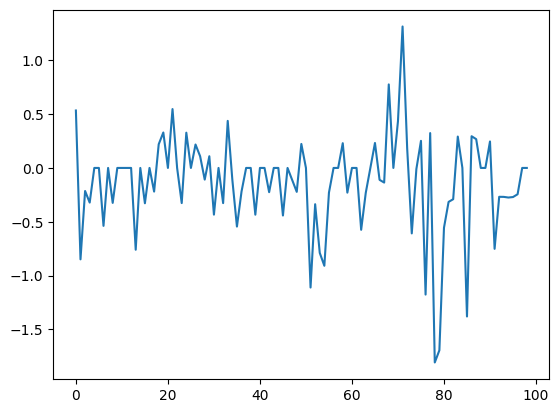

In [26]:
plt.plot(rolling_percs[1:])

In [27]:
os_df_CCA949_filled = os_df_CCA949.ffill()

In [28]:
def evaluate_model(model): 

    #metric = utils.Rolling(metrics.MAE(), 12)
    metric = metrics.MAE()

    dates = []
    y_trues = []
    y_preds = []
    altitudes = []

    for _, row in os_df_CCA949_filled.iterrows():

        # Obtain the prior prediction and update the model in one go
        x = row[["geo_altitude"]].to_dict()
        print(x)
        y = row["velocity"]
        y_pred = model.predict_one(x)
        model.learn_one(x, y)

        # Update the error metric
        metric.update(y, y_pred)

        # Store the true value and the prediction
        dates.append(row["timestamp"])
        y_trues.append(y)
        y_preds.append(y_pred)
        altitudes.append(row["geo_altitude"])

    # Plot the results
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.grid(alpha=0.75)
    ax.plot(dates, y_trues, lw=3, color='#2ecc71', alpha=0.8, label='Ground truth')
    ax.plot(dates, y_preds, lw=3, color='#e74c3c', alpha=0.8, label='Prediction')
    # ax.plot(dates, altitudes, lw=3, color='blue', alpha=0.8, label='Altitude')
    ax.legend()
    ax.set_title(metric)

In [29]:
model = compose.Pipeline(
    ('imputer', preprocessing.PreviousImputer()),
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression()),

)

{'geo_altitude': 10805.16}
{'geo_altitude': 10835.64}
{'geo_altitude': 10728.96}
{'geo_altitude': 10713.72}
{'geo_altitude': 10675.62}
{'geo_altitude': 10675.62}
{'geo_altitude': 10683.24}
{'geo_altitude': 10591.8}
{'geo_altitude': 10591.8}
{'geo_altitude': 10591.8}
{'geo_altitude': 10591.8}
{'geo_altitude': 10530.84}
{'geo_altitude': 10507.98}
{'geo_altitude': 10507.98}
{'geo_altitude': 10424.16}
{'geo_altitude': 10401.3}
{'geo_altitude': 10370.82}
{'geo_altitude': 10332.72}
{'geo_altitude': 10302.24}
{'geo_altitude': 10279.38}
{'geo_altitude': 10233.66}
{'geo_altitude': 10226.04}
{'geo_altitude': 10172.7}
{'geo_altitude': 10172.7}
{'geo_altitude': 10195.56}
{'geo_altitude': 10088.88}
{'geo_altitude': 10096.5}
{'geo_altitude': 10073.64}
{'geo_altitude': 10050.78}
{'geo_altitude': 10066.02}
{'geo_altitude': 9974.58}
{'geo_altitude': 9913.62}
{'geo_altitude': 9913.62}
{'geo_altitude': 9845.04}
{'geo_altitude': 9928.86}
{'geo_altitude': 9883.14}
{'geo_altitude': 9745.98}
{'geo_altitude':

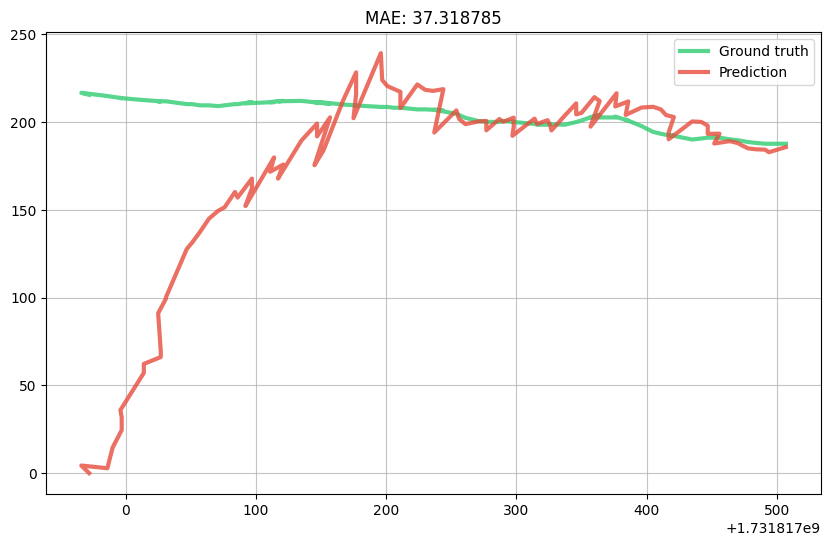

In [30]:
evaluate_model(model)

{'geo_altitude': 10805.16}
{'geo_altitude': 10835.64}
{'geo_altitude': 10728.96}
{'geo_altitude': 10713.72}
{'geo_altitude': 10675.62}
{'geo_altitude': 10675.62}
{'geo_altitude': 10683.24}
{'geo_altitude': 10591.8}
{'geo_altitude': 10591.8}
{'geo_altitude': 10591.8}
{'geo_altitude': 10591.8}
{'geo_altitude': 10530.84}
{'geo_altitude': 10507.98}
{'geo_altitude': 10507.98}
{'geo_altitude': 10424.16}
{'geo_altitude': 10401.3}
{'geo_altitude': 10370.82}
{'geo_altitude': 10332.72}
{'geo_altitude': 10302.24}
{'geo_altitude': 10279.38}
{'geo_altitude': 10233.66}
{'geo_altitude': 10226.04}
{'geo_altitude': 10172.7}
{'geo_altitude': 10172.7}
{'geo_altitude': 10195.56}
{'geo_altitude': 10088.88}
{'geo_altitude': 10096.5}
{'geo_altitude': 10073.64}
{'geo_altitude': 10050.78}
{'geo_altitude': 10066.02}
{'geo_altitude': 9974.58}
{'geo_altitude': 9913.62}
{'geo_altitude': 9913.62}
{'geo_altitude': 9845.04}
{'geo_altitude': 9928.86}
{'geo_altitude': 9883.14}
{'geo_altitude': 9745.98}
{'geo_altitude':

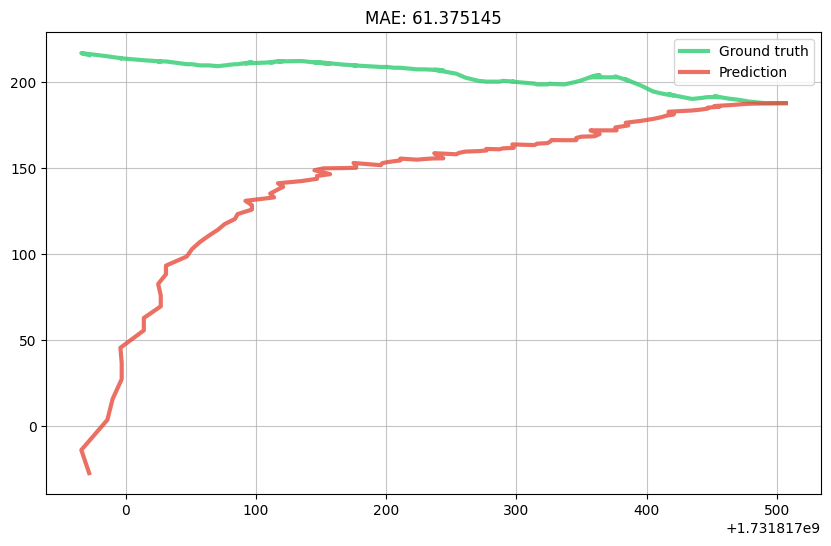

In [31]:
evaluate_model(model)

{'geo_altitude': 10805.16}
{'geo_altitude': 10835.64}
{'geo_altitude': 10728.96}
{'geo_altitude': 10713.72}
{'geo_altitude': 10675.62}
{'geo_altitude': 10675.62}
{'geo_altitude': 10683.24}
{'geo_altitude': 10591.8}
{'geo_altitude': 10591.8}
{'geo_altitude': 10591.8}
{'geo_altitude': 10591.8}
{'geo_altitude': 10530.84}
{'geo_altitude': 10507.98}
{'geo_altitude': 10507.98}
{'geo_altitude': 10424.16}
{'geo_altitude': 10401.3}
{'geo_altitude': 10370.82}
{'geo_altitude': 10332.72}
{'geo_altitude': 10302.24}
{'geo_altitude': 10279.38}
{'geo_altitude': 10233.66}
{'geo_altitude': 10226.04}
{'geo_altitude': 10172.7}
{'geo_altitude': 10172.7}
{'geo_altitude': 10195.56}
{'geo_altitude': 10088.88}
{'geo_altitude': 10096.5}
{'geo_altitude': 10073.64}
{'geo_altitude': 10050.78}
{'geo_altitude': 10066.02}
{'geo_altitude': 9974.58}
{'geo_altitude': 9913.62}
{'geo_altitude': 9913.62}
{'geo_altitude': 9845.04}
{'geo_altitude': 9928.86}
{'geo_altitude': 9883.14}
{'geo_altitude': 9745.98}
{'geo_altitude':

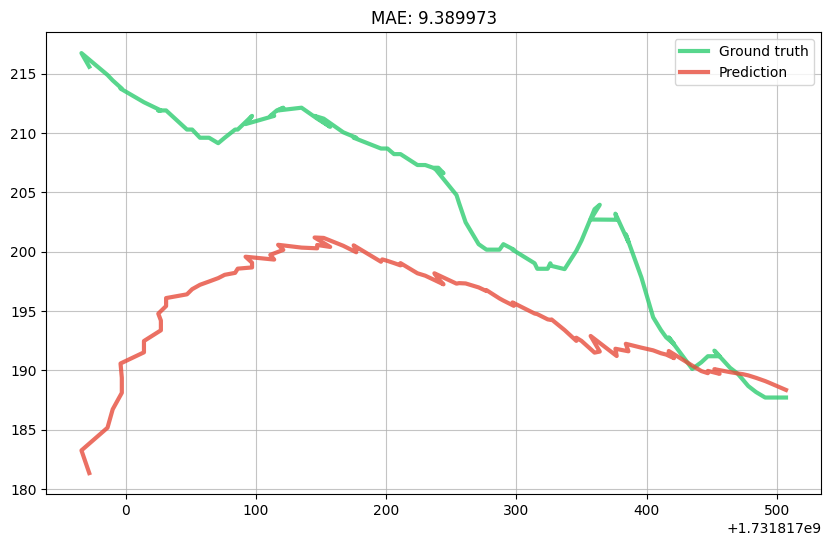

In [32]:
evaluate_model(model)

{'geo_altitude': 10805.16}
{'geo_altitude': 10835.64}
{'geo_altitude': 10728.96}
{'geo_altitude': 10713.72}
{'geo_altitude': 10675.62}
{'geo_altitude': 10675.62}
{'geo_altitude': 10683.24}
{'geo_altitude': 10591.8}
{'geo_altitude': 10591.8}
{'geo_altitude': 10591.8}
{'geo_altitude': 10591.8}
{'geo_altitude': 10530.84}
{'geo_altitude': 10507.98}
{'geo_altitude': 10507.98}
{'geo_altitude': 10424.16}
{'geo_altitude': 10401.3}
{'geo_altitude': 10370.82}
{'geo_altitude': 10332.72}
{'geo_altitude': 10302.24}
{'geo_altitude': 10279.38}
{'geo_altitude': 10233.66}
{'geo_altitude': 10226.04}
{'geo_altitude': 10172.7}
{'geo_altitude': 10172.7}
{'geo_altitude': 10195.56}
{'geo_altitude': 10088.88}
{'geo_altitude': 10096.5}
{'geo_altitude': 10073.64}
{'geo_altitude': 10050.78}
{'geo_altitude': 10066.02}
{'geo_altitude': 9974.58}
{'geo_altitude': 9913.62}
{'geo_altitude': 9913.62}
{'geo_altitude': 9845.04}
{'geo_altitude': 9928.86}
{'geo_altitude': 9883.14}
{'geo_altitude': 9745.98}
{'geo_altitude':

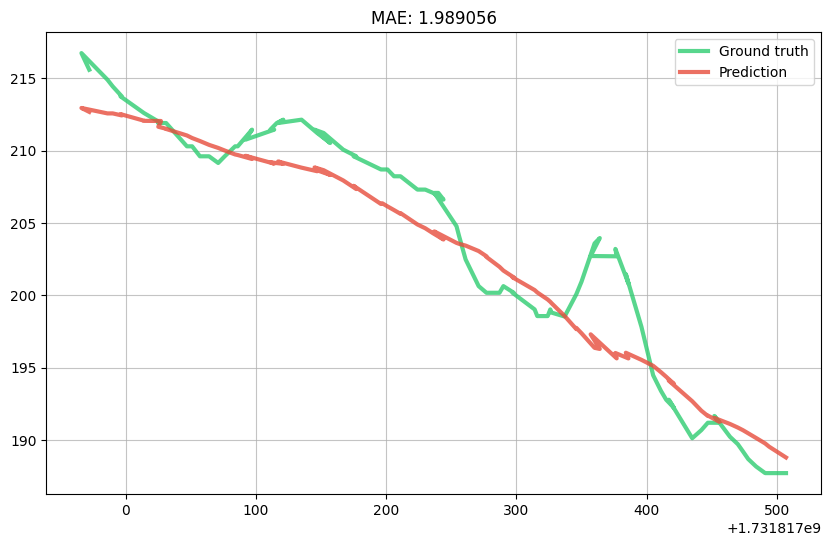

In [33]:
evaluate_model(model)